In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('lovoo_v3_users_api-results.csv')
data.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


In [4]:
data2 = pd.read_csv('lovoo_v3_users_instances.csv')
data.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


In [6]:
# merge two data
merge_data = pd.merge(data, data2, on = ['name', 'userId'], suffixes = (' ', ' '))
merge_data.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,freshman,hasBirthday,highlighted,distance,locked,mobile,online,whazzup,pictureId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,False,False,False,175.000000,False,True,False,Nur tote fische schwimmen mit dem strom,55303fc3160ba0eb728b4575,False
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,False,False,False,138.000000,False,True,False,Primaveraaa<3,552e7b61c66da10d1e8b4c82,False
2,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,False,False,False,77.300003,False,False,False,Je pense donc je suis. Instagram quedev,54c92738076ea1b5338b4735,False
3,F,M,24,Baby dee,0.81,18,7339,180,0,2,...,False,False,False,194.000000,False,True,True,Wicked Wonderland💕❤️,54f2b4ce0b6ea1177e8b4d18,False
4,F,none,24,Anna,0.65,13,18672,492,0,1,...,False,False,False,318.000000,False,True,True,💚 ✅ Instagram : anna_lem0n,54ecbb39170ba08b488b4aa5,False


In [8]:
# delete duplicate
df = merge_data.loc[:,~merge_data.columns.duplicated()]
df

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,locationCitySub,userInfo_visitDate,countDetails,flirtstar,freshman,hasBirthday,highlighted,locked,mobile,online
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,NaN,NaN,1.00,False,False,False,False,False,True,False
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,NaN,NaN,0.85,False,False,False,False,False,True,False
2,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,NaN,NaN,0.12,False,False,False,False,False,False,False
3,F,M,24,Baby dee,0.81,18,7339,180,0,2,...,NaN,NaN,0.81,False,False,False,False,False,True,True
4,F,none,24,Anna,0.65,13,18672,492,0,1,...,NaN,NaN,0.65,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,F,M,22,Ser**a,0.85,6,1003,98,0,0,...,NaN,NaN,0.85,False,False,False,False,False,True,False
2920,F,M,24,Mon**a,1.00,7,6890,563,0,0,...,NaN,NaN,1.00,False,False,False,False,False,True,True
2921,F,M,20,Fa**y,0.90,4,1157,52,1,0,...,NaN,NaN,0.90,False,False,False,False,False,True,False
2922,F,M,20,Fa**y,0.90,4,1157,52,1,0,...,NaN,NaN,0.90,False,False,False,False,False,True,False


In [10]:
df.isna().sum()

gender                        0
genderLooking                 0
age                           0
name                          0
counts_details                0
counts_pictures               0
counts_profileVisits          0
counts_kisses                 0
counts_fans                   0
counts_g                      0
flirtInterests_chat           0
flirtInterests_friends        0
flirtInterests_date           0
country                       0
city                        209
location                     10
distance                     43
isFlirtstar                   0
isHighlighted                 0
isInfluencer                  0
isMobile                      0
isNew                         0
isOnline                      0
isVip                         0
lang_count                    0
lang_fr                       0
lang_en                       0
lang_de                       0
lang_it                       0
lang_es                       0
lang_pt                       0
verified

In [11]:
# drop all columns with nan value
df = df.dropna(axis = 1)
df

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,isVIP,isVerified,countDetails,flirtstar,freshman,hasBirthday,highlighted,locked,mobile,online
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,False,False,1.00,False,False,False,False,False,True,False
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,False,False,0.85,False,False,False,False,False,True,False
2,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,False,False,0.12,False,False,False,False,False,False,False
3,F,M,24,Baby dee,0.81,18,7339,180,0,2,...,False,False,0.81,False,False,False,False,False,True,True
4,F,none,24,Anna,0.65,13,18672,492,0,1,...,False,False,0.65,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,F,M,22,Ser**a,0.85,6,1003,98,0,0,...,False,False,0.85,False,False,False,False,False,True,False
2920,F,M,24,Mon**a,1.00,7,6890,563,0,0,...,False,True,1.00,False,False,False,False,False,True,True
2921,F,M,20,Fa**y,0.90,4,1157,52,1,0,...,False,False,0.90,False,False,False,False,False,True,False
2922,F,M,20,Fa**y,0.90,4,1157,52,1,0,...,False,False,0.90,False,False,False,False,False,True,False


In [13]:
list(df.columns)

['gender ',
 'genderLooking',
 'age ',
 'name',
 'counts_details',
 'counts_pictures ',
 'counts_profileVisits ',
 'counts_kisses ',
 'counts_fans',
 'counts_g',
 'flirtInterests_chat ',
 'flirtInterests_friends ',
 'flirtInterests_date ',
 'country',
 'isFlirtstar',
 'isHighlighted',
 'isInfluencer',
 'isMobile',
 'isNew',
 'isOnline',
 'isVip',
 'lang_count ',
 'lang_fr ',
 'lang_en ',
 'lang_de ',
 'lang_it ',
 'lang_es ',
 'lang_pt ',
 'verified',
 'shareProfileEnabled',
 'birthd',
 'userId',
 'connectedToFacebook',
 'isVIP',
 'isVerified',
 'countDetails',
 'flirtstar',
 'freshman',
 'hasBirthday',
 'highlighted',
 'locked',
 'mobile',
 'online']

In [14]:
highlight = df['highlighted'].value_counts()
highlight

False    2886
True       38
Name: highlighted, dtype: int64

<AxesSubplot:>

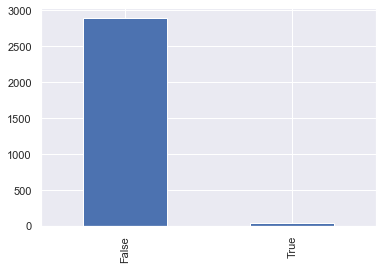

In [15]:
highlight.plot.bar()

Highlight : Whether the user's profile is currently highlighted (at fetch time). [A user can use in-app currency to have one's profile temporarily highlighted and get more impressions/matches]